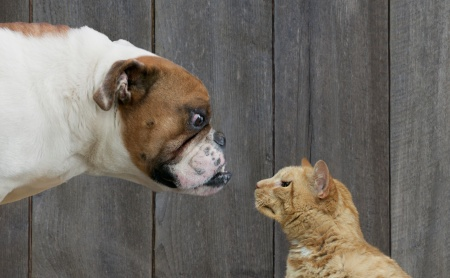
Cão versus Gato

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [ ]:
Image_Width=224
Image_Height=224
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
!pwd

/home/jpalves


In [ ]:
filenames=os.listdir("/home/jpalves/Trabalho/dogs-vs-cats/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [ ]:
type(df['category'][0])

numpy.int64

In [ ]:
#df = df.sort_values(by='filename',ascending=True)
df.head()

,filename,category
0,cat.9855.jpg,0
1,cat.11730.jpg,0
2,dog.1500.jpg,1
3,dog.12255.jpg,1
4,cat.1143.jpg,0


In [ ]:
df['category'].value_counts()

0    12500
1    12500
Name: category, dtype: int64

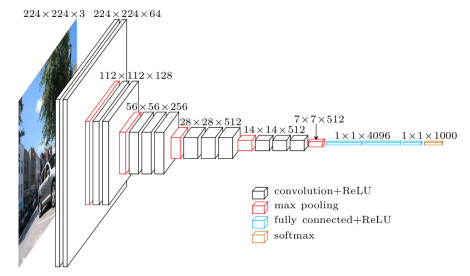VGG16

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,Activation,BatchNormalization


model = Sequential()
model.add(Conv2D(input_shape=(Image_Width,Image_Height,Image_Channels),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss=['CategoricalCrossentropy'],
                  metrics=['categorical_accuracy'])

2022-04-29 09:17:20.779962: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 09:17:20.784007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 09:17:20.784628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 09:17:20.785935: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      9232      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 64)        1

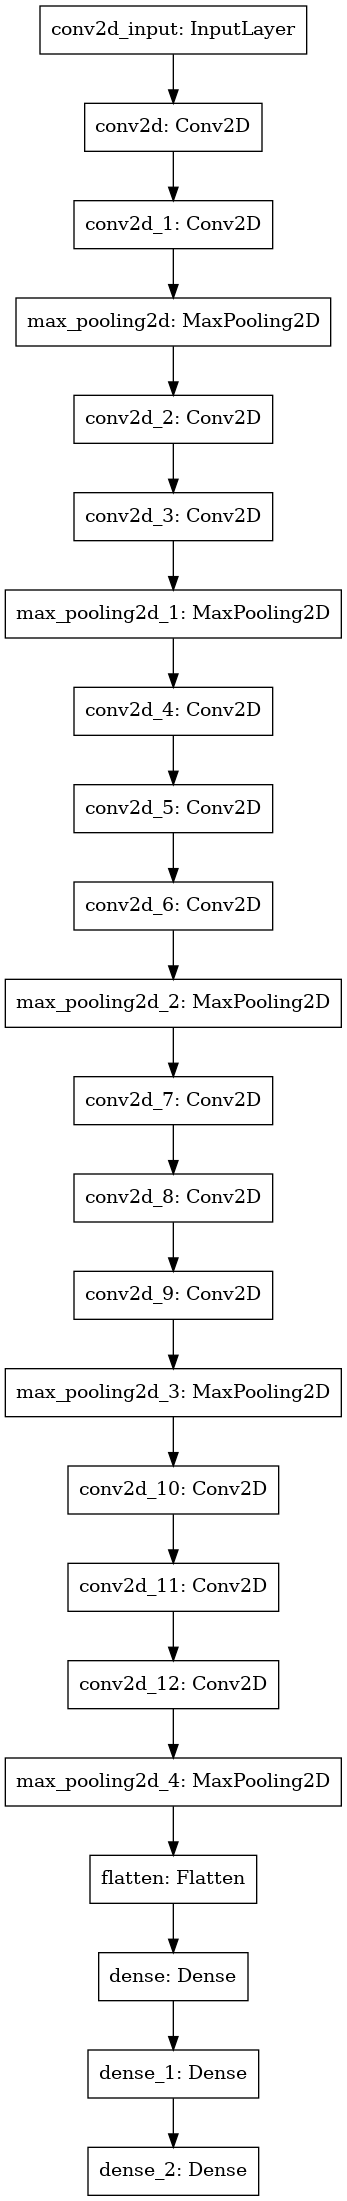

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
train_df.head()

,filename,category
0,cat.2211.jpg,cat
1,dog.4559.jpg,dog
2,cat.596.jpg,cat
3,cat.2396.jpg,cat
4,cat.6845.jpg,cat


In [ ]:
df['category'].value_counts()

cat    12500
dog    12500
Name: category, dtype: int64

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/home/jpalves/Trabalho/dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/home/jpalves/Trabalho/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
epochs=100
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  mode='min',
                                                  verbose=1,
                                                  restore_best_weights=True,
                                                  patience=40))

2022-04-29 09:18:38.112321: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-29 09:18:38.905539: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


1333/1333 [==============================] - 187s 138ms/step - loss: 0.6709 - categorical_accuracy: 0.5738 - val_loss: 0.6391 - val_categorical_accuracy: 0.6320
Epoch 2/100
1333/1333 [==============================] - 182s 137ms/step - loss: 0.6230 - categorical_accuracy: 0.6466 - val_loss: 0.6023 - val_categorical_accuracy: 0.6639
Epoch 3/100
1333/1333 [==============================] - 181s 136ms/step - loss: 0.5829 - categorical_accuracy: 0.6857 - val_loss: 0.5694 - val_categorical_accuracy: 0.6951
Epoch 4/100
1333/1333 [==============================] - 183s 137ms/step - loss: 0.5490 - categorical_accuracy: 0.7150 - val_loss: 0.5558 - val_categorical_accuracy: 0.7123
Epoch 5/100
1333/1333 [==============================] - 186s 139ms/step - loss: 0.5320 - categorical_accuracy: 0.7309 - val_loss: 0.5234 - val_categorical_accuracy: 0.7369
Epoch 6/100
1333/1333 [==============================] - 185s 139ms/step - loss: 0.5186 - categorical_accuracy: 0.7374 - val_loss: 0.5450 - val_cat

In [ ]:
model.save("model1_catsVSdogs_100_epoch.h5")

In [ ]:
test_filenames = os.listdir("/home/jpalves/Trabalho/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

,filename
0,5627.jpg
1,10092.jpg
2,4741.jpg
3,1073.jpg
4,1009.jpg


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                 "/home/jpalves/Trabalho/dogs-vs-cats/test1/",x_col='filename',y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 shuffle=False,
                                                 batch_size=batch_size)

Found 12500 validated image filenames.


In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category'] = test_df['category'].replace({ 0:'cat', 1:'dog'})

In [ ]:
test_df.head()

,filename,category
0,5627.jpg,cat
1,10092.jpg,dog
2,4741.jpg,cat
3,1073.jpg,cat
4,1009.jpg,dog


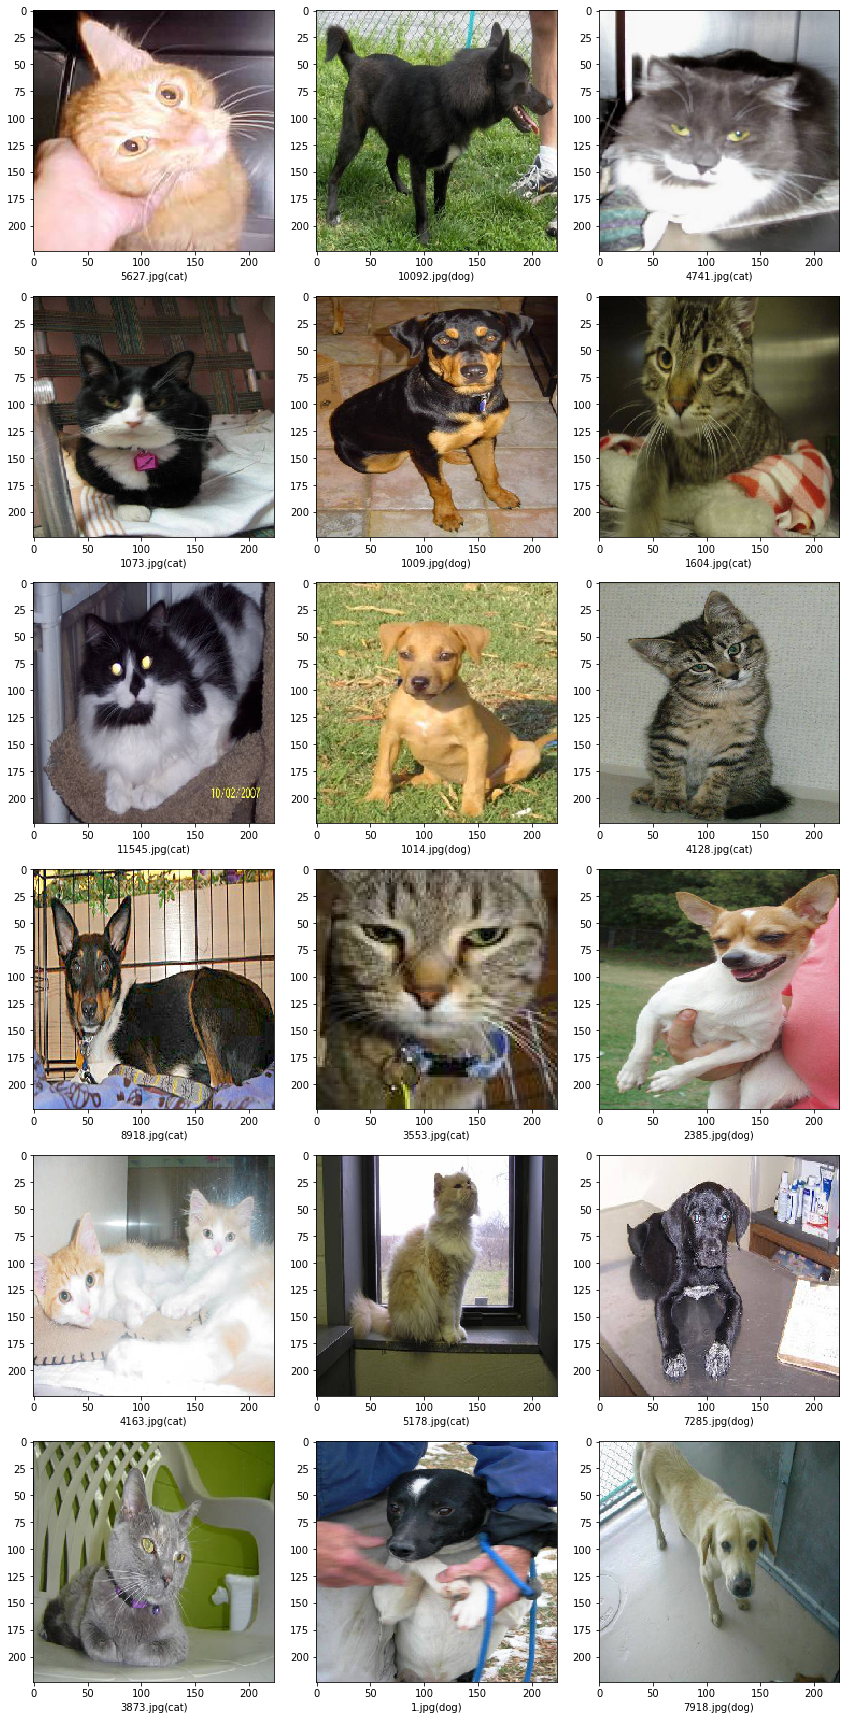

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/home/jpalves/Trabalho/dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("/home/jpalves/Trabalho/dogs-vs-cats/test1/8918.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255.0
pred=model.predict([im])[0]
print(pred)
inds = pred.argsort()[::-1][:5]
#print(inds)
cls_list = ['gato', 'cão']
for i in inds:
  print('    {:.3f}  {}'.format(pred[i], cls_list[i]))


[0.9079742  0.09202589]
    0.908  gato
    0.092  cão
